<a href="https://colab.research.google.com/github/yedini/DL_tensorflow/blob/main/part1_Basic_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive



In [ ]:
file = '/content/drive/MyDrive/딥러닝/tensorflow로 시작하는 딥러닝/실습/data-04-zoo.csv'
import pandas as pd
e = pd.read_csv(file)

# lab02.SLR을 tensorflow로 구현하기

###Hypothesis

In [ ]:
# x와 y 데이터가 같음: 입력과 출력이 같은 모델
x_data = [1,2,3,4,5]
y_data = [1,2,3,4,5]

# 초기값: 임의로 지정
W = tf.Variable(2.0)
b = tf.Variable(0.5)

hypothesis = W * x_data + b

In [ ]:
W.numpy(), b.numpy()

(2.0, 0.5)

### Cost

In [ ]:
cost = tf.reduce_mean(tf.square(hypothesis - y_data)) 


In [ ]:
# tf.reduce_mean : 차원 제거 후 평균 계산.
v = [1., 2., 3., 4.]
tf.reduce_mean(v)  #2.5 : rank가 1에서 0차원으로 줄어들었다.

<tf.Tensor: shape=(), dtype=float32, numpy=2.5>

In [ ]:
# tf.square()
tf.square(3)

<tf.Tensor: shape=(), dtype=int32, numpy=9>

### Gradient descent : 경사하강법        
cost(W,b)를 minimize하는 W,b 찾기       
          
tf.GradientTape() 함수 사용, 보통 with 구문과 같이 쓰인다.      
with 구문 안의 변수들에 대한 정보를 tape에 저장한다.

In [ ]:
### Gradient descent 과정

# learning rate 초기값
learning_rate = 0.01   # : 기울기를 얼마만큼 반영해서 변수를 업데이트 할건지 결정함.

#gradient descent
with tf.GradientTape() as tape:
  hypothesis = W * x_data + b
  cost = tf.reduce_mean(tf.square(hypothesis - y_data)) 
  #hypothesis와 cost가 tape에 저장됨.

W_grad, b_grad = tape.gradient(cost, [W,b]) #tape에 저장된 cost를 W와 b에 대해 각각 미분해서 기울기값을 W_grad, b_grad로 반환

# A.assign_sub(B) : A = A-B
W.assign_sub(learning_rate * W_grad) # W를 업데이트
b.assign_sub(learning_rate * b_grad) # b를 업데이트

In [ ]:
### 여러번 반복해서 parameter 값 구하기

W = tf.Variable(2.9)
b = tf.Variable(0.5)
learning_rate = 0.01 

for i in range(100):
  #gradient descent
  with tf.GradientTape() as tape:
    hypothesis = W * x_data + b
    cost = tf.reduce_mean(tf.square(hypothesis - y_data)) 
  
  W_grad, b_grad = tape.gradient(cost, [W,b])

  W.assign_sub(learning_rate * W_grad) # W를 업데이트
  b.assign_sub(learning_rate * b_grad) # b를 업데이트

  if i % 10 == 0:
    print("{:5}|{:10.4}|{:10.4}|{:10.6f}".format(i, W.numpy(), b.numpy(), cost))

    0|     2.452|     0.376| 45.660004
   10|     1.104|  0.003398|  0.206336
   20|     1.013|  -0.02091|  0.001026
   30|     1.007|  -0.02184|  0.000093
   40|     1.006|  -0.02123|  0.000083
   50|     1.006|  -0.02053|  0.000077
   60|     1.005|  -0.01984|  0.000072
   70|     1.005|  -0.01918|  0.000067
   80|     1.005|  -0.01854|  0.000063
   90|     1.005|  -0.01793|  0.000059


(0.0, 8.0)

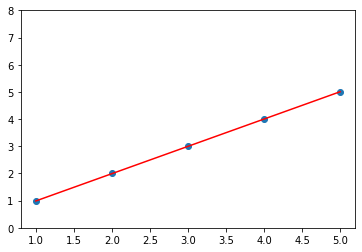

In [ ]:
plt.plot(x_data, y_data, 'o')
plt.plot(x_data, hypothesis.numpy(), 'r-')
plt.ylim(0, 8)

### Predict

In [ ]:
print(W * 5 + b)
print(W * 2.5 + b)

tf.Tensor(5.0066934, shape=(), dtype=float32)
tf.Tensor(2.4946523, shape=(), dtype=float32)


# lab03. Linear Regresion and Hot to minimize cost를 Tensorflow로 구현하기

### cost function을 순수하게 python으로 구현

In [ ]:
x = np.array([1,2,3])
y = np.array([1,2,3])

def cost_func(W, x, y):
  C = 0
  for i in range(len(x)):
    C += (W*x[i]-y[i])**2
  return C / len(x)

for feed_W in np.linspace(-3, 5, num=15): # -3에서 5사이를 15개의 구간으로 나눔
  curr_cost = cost_func(feed_W, x, y)
  print("{:6.3f}|{:10.5f}".format(feed_W, curr_cost))

-3.000|  74.66667
-2.429|  54.85714
-1.857|  38.09524
-1.286|  24.38095
-0.714|  13.71429
-0.143|   6.09524
 0.429|   1.52381
 1.000|   0.00000
 1.571|   1.52381
 2.143|   6.09524
 2.714|  13.71429
 3.286|  24.38095
 3.857|  38.09524
 4.429|  54.85714
 5.000|  74.66667


### 같은 내용을 tensorflow로 구현

In [ ]:
x = np.array([1,2,3])
y = np.array([1,2,3])

def cost_func(W, x, y):
  hypothesis = x*W
  return tf.reduce_mean(tf.square(hypothesis-y))

W_values = np.linspace(-3, 5, num=15)
cost_values=[]

for feed_W in W_values:
  curr_cost = cost_func(feed_W, x, y)
  cost_values.append(curr_cost)
  print("{:6.3f}|{:10.5f}".format(feed_W, curr_cost))

-3.000|  74.66667
-2.429|  54.85714
-1.857|  38.09524
-1.286|  24.38095
-0.714|  13.71429
-0.143|   6.09524
 0.429|   1.52381
 1.000|   0.00000
 1.571|   1.52381
 2.143|   6.09524
 2.714|  13.71429
 3.286|  24.38095
 3.857|  38.09524
 4.429|  54.85714
 5.000|  74.66667


### Gradient descent

In [ ]:
tf.random.set_seed(0)  #random seed 설정

x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable(tf.random.normal((1,), -100., 100.)) #-100부터 100 안에서 normal을 따르는, 모양이 하나짜리인 random variable

for step in range(300):
  hypothesis  = W*x
  cost = tf.reduce_mean(tf.square(hypothesis - y))

  alpha = 0.01
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,x)-y, x))
  descent = W - tf.multiply(alpha, gradient)
  W.assign(descent)

  if step % 10 == 0:
    print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 | 11716.3086 |  48.767971
   10 |  4504.9126 |  30.619968
   20 |  1732.1364 |  19.366755
   30 |   666.0052 |  12.388859
   40 |   256.0785 |   8.062004
   50 |    98.4620 |   5.379007
   60 |    37.8586 |   3.715335
   70 |    14.5566 |   2.683725
   80 |     5.5970 |   2.044044
   90 |     2.1520 |   1.647391
  100 |     0.8275 |   1.401434
  110 |     0.3182 |   1.248922
  120 |     0.1223 |   1.154351
  130 |     0.0470 |   1.095710
  140 |     0.0181 |   1.059348
  150 |     0.0070 |   1.036801
  160 |     0.0027 |   1.022819
  170 |     0.0010 |   1.014150
  180 |     0.0004 |   1.008774
  190 |     0.0002 |   1.005441
  200 |     0.0001 |   1.003374
  210 |     0.0000 |   1.002092
  220 |     0.0000 |   1.001297
  230 |     0.0000 |   1.000804
  240 |     0.0000 |   1.000499
  250 |     0.0000 |   1.000309
  260 |     0.0000 |   1.000192
  270 |     0.0000 |   1.000119
  280 |     0.0000 |   1.000074
  290 |     0.0000 |   1.000046


In [ ]:
# W가 특정 값을 가질 때 (W=5)
x_data = [1., 2., 3., 4.]
y_data = [1., 3., 5., 7.]

W = tf.Variable([5.0]) 

for step in range(300):
  hypothesis  = W*x
  cost = tf.reduce_mean(tf.square(hypothesis - y))

  alpha = 0.01
  gradient = tf.reduce_mean(tf.multiply(tf.multiply(W,x)-y, x))
  descent = W - tf.multiply(alpha, gradient)
  W.assign(descent)

  if step % 10 == 0:
    print('{:5} | {:10.4f} | {:10.6f}'.format(
            step, cost.numpy(), W.numpy()[0]))

    0 |    74.6667 |   4.813334
   10 |    28.7093 |   3.364572
   20 |    11.0387 |   2.466224
   30 |     4.2444 |   1.909177
   40 |     1.6320 |   1.563762
   50 |     0.6275 |   1.349578
   60 |     0.2413 |   1.216766
   70 |     0.0928 |   1.134412
   80 |     0.0357 |   1.083346
   90 |     0.0137 |   1.051681
  100 |     0.0053 |   1.032047
  110 |     0.0020 |   1.019871
  120 |     0.0008 |   1.012322
  130 |     0.0003 |   1.007641
  140 |     0.0001 |   1.004738
  150 |     0.0000 |   1.002938
  160 |     0.0000 |   1.001822
  170 |     0.0000 |   1.001130
  180 |     0.0000 |   1.000700
  190 |     0.0000 |   1.000434
  200 |     0.0000 |   1.000269
  210 |     0.0000 |   1.000167
  220 |     0.0000 |   1.000103
  230 |     0.0000 |   1.000064
  240 |     0.0000 |   1.000040
  250 |     0.0000 |   1.000025
  260 |     0.0000 |   1.000015
  270 |     0.0000 |   1.000009
  280 |     0.0000 |   1.000006
  290 |     0.0000 |   1.000004


# lab04. Multi-variable Linear Regression을 tensorflow로 구현하기

### Multi-variale linear regression

In [ ]:
# data and label
x1 = [ 73.,  93.,  89.,  96.,  73.]
x2 = [ 80.,  88.,  91.,  98.,  66.]
x3 = [ 75.,  93.,  90., 100.,  70.]
Y  = [152., 185., 180., 196., 142.]

#random weights
w1 = tf.Variable(tf.random.normal((1,)))
w2 = tf.Variable(tf.random.normal((1,)))
w3 = tf.Variable(tf.random.normal((1,)))
b = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

for i in range(1000+1):
  # tf.GradientTape() : cost function의 gradient를 기록
  with tf.GradientTape() as tape:
    hypothesis = w1*x1 + w2*x2 + w3*x3 + b
    cost = tf.reduce_mean(tf.square(hypothesis-Y))

  #calculates the gradients of the cost
  w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

  # update w1, w2, w3 and b
  w1.assign_sub(learning_rate * w1_grad)    # w1 -= learning_rate*w1_grad와 같음
  w2.assign_sub(learning_rate * w2_grad)
  w3.assign_sub(learning_rate * w3_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 50 == 0:
    print("{:5}|{:12.4f}".format(i, cost.numpy()))

    0|  24381.2793
   50|    294.9754
  100|     27.6518
  150|     24.6245
  200|     24.5302
  250|     24.4685
  300|     24.4074
  350|     24.3465
  400|     24.2856
  450|     24.2249
  500|     24.1646
  550|     24.1043
  600|     24.0441
  650|     23.9840
  700|     23.9243
  750|     23.8646
  800|     23.8051
  850|     23.7458
  900|     23.6866
  950|     23.6275
 1000|     23.5686


위에서 사용한 데이터를 행렬식으로 표현

In [ ]:
data = np.array([
    # X1,   X2,    X3,   y
    [ 73.,  80.,  75., 152. ],
    [ 93.,  88.,  93., 185. ],
    [ 89.,  91.,  90., 180. ],
    [ 96.,  98., 100., 196. ],
    [ 73.,  66.,  70., 142. ]
], dtype=np.float32)

#slice data
X = data[:, :-1]
y = data[:, [-1]]

#random weights
W = tf.Variable(tf.random.normal((3,1)))
b = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

# hypothesis, prediction function
def predict(X):
  return tf.matmul(X, W)+b    # 행렬곱

print("epoch | cost")

n_epochs=2000

for i in range(n_epochs+1):
  with tf.GradientTape() as tape:
    cost = tf.reduce_mean((tf.square(predict(X)-y)))

  W_grad, b_grad = tape.gradient(cost, [W,b])

  W.assign_sub(learning_rate * W_grad)
  b.assign_sub(learning_rate * b_grad)

  if i % 100 == 0:
    print("{:5} | {:10.4f}".format(i, cost.numpy()))

epoch | cost
    0 | 16146.4160
  100 |    44.5399
  200 |    42.3318
  300 |    42.1071
  400 |    41.8840
  500 |    41.6620
  600 |    41.4411
  700 |    41.2215
  800 |    41.0031
  900 |    40.7858
 1000 |    40.5698
 1100 |    40.3548
 1200 |    40.1410
 1300 |    39.9285
 1400 |    39.7170
 1500 |    39.5068
 1600 |    39.2977
 1700 |    39.0895
 1800 |    38.8826
 1900 |    38.6768
 2000 |    38.4721


# Lab05. Logistic Regression/Classification을 tensorflow로 구현하기

In [ ]:
tf.random.set_seed(777)

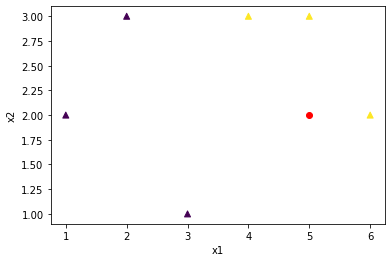

In [ ]:

x_train = [[1., 2.],
          [2., 3.],
          [3., 1.],
          [4., 3.],
          [5., 3.],
          [6., 2.]]
y_train = [[0.],
          [0.],
          [0.],
          [1.],
          [1.],
          [1.]]

x_test = [[5.,2.]]
y_test = [[1.]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]

colors = [int(y[0] % 3) for y in y_train]
plt.scatter(x1,x2, c=colors , marker='^')
plt.scatter(x_test[0][0],x_test[0][1], c="red")

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

### Logistic classification
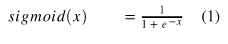

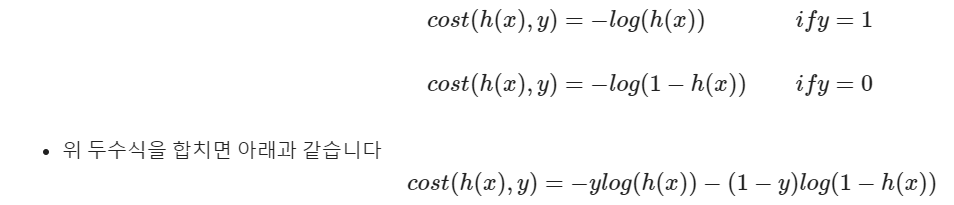

In [ ]:
# dataset 생성
#   tf.data.Dataset.from_tensor_slices:데이터 개수에 맞게 슬라이싱
#   -> 6개의 슬라이스가 만들어지고 각 슬라이스는 1행2열, 1행임.
#   batch : 한번에 학습시킬 size
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

# Weight & bias
W = tf.Variable(tf.zeros([2,1]), name="weight")
b = tf.Variable(tf.zeros([1]), name='bias')


#sigmoid 함수를 가설로 선언함
def logistic_regression(features):
  hypothesis = tf.divide(1., 1.+tf.exp(-tf.matmul(features, W)+b))
  return hypothesis


#cost 함수 정의
def loss_fn(hypothesis, labels):
  cost = -tf.reduce_mean(labels*tf.math.log(hypothesis) + (1-labels)*tf.math.log(1-hypothesis))
  return cost

optimizer = tf.keras.optimizers.SGD(learning_rate = 0.01) #SGD:확률적경사하강법


# 0.5와 비교하여 1 또는 0 출력 + 실제 값과 비교하여 정확도 측정
def accuracy_fn(hypothesis, labels):
  predicte = tf.cast(hypothesis >0.5, dtype=tf.float32)
  accuracy = tf.reduce_mean(tf.cast(tf.equal(predicte, labels), dtype=tf.int32))
  return accuracy


#gradient 계산 함수
def grad(features, labels):
  with tf.GradientTape() as tape:
    hypothesis = logistic_regression(features)
    loss_value = loss_fn(hypothesis, labels)
  return tape.gradient(loss_value, [W,b])


In [ ]:
## 학습
EPOCHS = 1001
for step in range(EPOCHS):
  for features, labels in iter(dataset.batch(len(x_train))):
    hypothesis = logistic_regression(features)
    grads = grad(features, labels)
    optimizer.apply_gradients(grads_and_vars=zip(grads, [W,b]))
    
    if step % 100 ==0:
      print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(hypothesis,labels)))

Iter: 0, Loss: 0.6931
Iter: 100, Loss: 0.5781
Iter: 200, Loss: 0.5352
Iter: 300, Loss: 0.5056
Iter: 400, Loss: 0.4840
Iter: 500, Loss: 0.4673
Iter: 600, Loss: 0.4537
Iter: 700, Loss: 0.4421
Iter: 800, Loss: 0.4320
Iter: 900, Loss: 0.4229
Iter: 1000, Loss: 0.4145


In [ ]:
# test data로 검증
test_acc = accuracy_fn(logistic_regression(x_test),y_test)
print("Test Result = {}".format(tf.cast(logistic_regression(x_test) > 0.5, dtype=tf.int32)))  
print("Testset Accuracy: {:.4f}".format(test_acc))

Test Result = [[1]]
Testset Accuracy: 1.0000


# Lab06-1: Softmax classifier를 Tensorflow로 구현하기

In [ ]:
tf.random.set_seed(777)

x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

#데이터를 float format numpy array로 변환
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

print(x_data.shape)
print(y_data.shape)

(8, 4)
(8, 3)


In [ ]:
#weight, bias setting
nb_classes = 3  #class 개수

W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables=[W,b]

print(W,b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.7706481 ,  0.37335402, -0.05576323],
       [ 0.00358377, -0.5898363 ,  1.5702795 ],
       [ 0.2460895 , -0.09918973,  1.4418385 ],
       [ 0.3200988 ,  0.526784  , -0.7703731 ]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([-1.3080608 , -0.13253094,  0.5513761 ], dtype=float32)>


In [ ]:
# tf.nn.softmax : softmax 활성함수 계산
#  softmax : exp(logit) / reduce_sum(exp(logit), dim)

def hypothesis(X):
  return tf.nn.softmax(tf.matmul(X,W) + b)

print(hypothesis(x_data))

tf.Tensor(
[[1.36571964e-02 7.90162385e-03 9.78441238e-01]
 [3.92597765e-02 1.70347411e-02 9.43705440e-01]
 [3.80385250e-01 1.67723164e-01 4.51891571e-01]
 [3.23390484e-01 5.90759404e-02 6.17533624e-01]
 [3.62997389e-06 6.20727292e-08 9.99996305e-01]
 [2.62520202e-02 1.07279625e-02 9.63019967e-01]
 [1.56525111e-05 4.21802753e-07 9.99983907e-01]
 [2.94076904e-06 3.81133276e-08 9.99997020e-01]], shape=(8, 3), dtype=float32)


In [ ]:
## softmax onehot test
sample_db = [[8,2,1,4]]
sample_db = np.asarray(sample_db, dtype=np.float32)

print(hypothesis(sample_db))

tf.Tensor([[0.9302204  0.06200533 0.00777428]], shape=(1, 3), dtype=float32)


In [ ]:
## cost function
def cost_fn(X,Y):
  logits = hypothesis(X)
  cost = -tf.reduce_sum(Y*tf.math.log(logits), axis=1)
  cost_mean = tf.reduce_mean(cost)

  return cost_mean

print(cost_fn(x_data, y_data))

tf.Tensor(6.07932, shape=(), dtype=float32)


In [ ]:
x = tf.constant(3.0) #상수값 3을 가지는 tensor를 만듦.
with tf.GradientTape()as g:
  g.watch(x)  #tf.Tensor인 x를 tape(여기서 g)에 기록하도록 함
  y = x * x  #x제곱

dy_dx = g.gradient(y, x)  #x제곱을 y에 대해 미분해서 2x가 됐는데 x가 3이므로 값은 6
print(dy_dx)   

tf.Tensor(6.0, shape=(), dtype=float32)


In [ ]:
def grad_fn(X,Y):
  with tf.GradientTape() as tape:
    loss = cost_fn(X,Y)
    grads = tape.gradient(loss, variables)

    return grads

print(grad_fn(x_data, y_data))

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 0.06914607, -0.6509784 ,  0.5818323 ],
       [-1.5221257 , -1.214863  ,  2.7369885 ],
       [-1.2473828 , -1.7611003 ,  3.008483  ],
       [-1.2014606 , -1.8659233 ,  3.0673838 ]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.15212913, -0.34219202,  0.4943211 ], dtype=float32)>]


In [ ]:
def fit(X, Y, epochs=2000, verbose=100):
  optimizer = tf.keras.optimizers.SGD(learning_rate = 0.1)

  for i in range(epochs):
    grads = grad_fn(X,Y)
    optimizer.apply_gradients(zip(grads, variables))
    if (i==0) | ((i+1) % verbose == 0):
      print('Loss at epoch %d: %f' %(i+1, cost_fn(X,Y).numpy()))

fit(x_data, y_data)

Loss at epoch 1: 1.607907
Loss at epoch 100: 0.682433
Loss at epoch 200: 0.612607
Loss at epoch 300: 0.557165
Loss at epoch 400: 0.507341
Loss at epoch 500: 0.460130
Loss at epoch 600: 0.414159
Loss at epoch 700: 0.368730
Loss at epoch 800: 0.323637
Loss at epoch 900: 0.279885
Loss at epoch 1000: 0.246333
Loss at epoch 1100: 0.232564
Loss at epoch 1200: 0.221432
Loss at epoch 1300: 0.211281
Loss at epoch 1400: 0.201986
Loss at epoch 1500: 0.193442
Loss at epoch 1600: 0.185563
Loss at epoch 1700: 0.178275
Loss at epoch 1800: 0.171515
Loss at epoch 1900: 0.165229
Loss at epoch 2000: 0.159370


In [ ]:
#prediction check
sample_data = [[2,1,3,2]] # answer_label [[0,0,1]]
sample_data = np.asarray(sample_data, dtype=np.float32)

a = hypothesis(sample_data)

print(a)
print(tf.argmax(a,1))

tf.Tensor([[0.00112729 0.08148744 0.91738534]], shape=(1, 3), dtype=float32)
tf.Tensor([2], shape=(1,), dtype=int64)


In [ ]:
b = hypothesis(x_data)
print(b)
print(tf.argmax(b, 1))
print(tf.argmax(y_data, 1)) # matches with y_data

tf.Tensor(
[[2.1849892e-06 1.2296573e-03 9.9876815e-01]
 [1.1272870e-03 8.1487469e-02 9.1738522e-01]
 [2.2046046e-07 1.6407272e-01 8.3592701e-01]
 [6.3633288e-06 8.5055929e-01 1.4943434e-01]
 [2.6134691e-01 7.2661781e-01 1.2035286e-02]
 [1.3774882e-01 8.6222386e-01 2.7332031e-05]
 [7.4253321e-01 2.5742996e-01 3.6859645e-05]
 [9.2206258e-01 7.7936895e-02 5.9709714e-07]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


### 하나의 class로 만들기

In [ ]:
class softmax_classifer(tf.keras.Model):
    def __init__(self, nb_classes):
        super(softmax_classifer, self).__init__()
        self.W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
        self.b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
        
    def softmax_regression(self, X):
        return tf.nn.softmax(tf.matmul(X, self.W) + self.b)
    
    def cost_fn(self, X, Y):
        logits = self.softmax_regression(X)
        cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(logits), axis=1))        
        return cost
    
    def grad_fn(self, X, Y):
        with tf.GradientTape() as tape:
            cost = self.cost_fn(x_data, y_data)
            grads = tape.gradient(cost, self.variables)            
            return grads
    
    def fit(self, X, Y, epochs=2000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

        for i in range(epochs):
            grads = self.grad_fn(X, Y)
            optimizer.apply_gradients(zip(grads, self.variables))
            if (i==0) | ((i+1)%verbose==0):
                print('Loss at epoch %d: %f' %(i+1, self.cost_fn(X, Y).numpy()))
            
model = softmax_classifer(nb_classes)
model.fit(x_data, y_data)

# Lab06-2. Fancy softmax classifier를 tensorflow로 구현하기     
logit을 input값으로 받는 경우.

In [ ]:
tf.random.set_seed(777)

xy = np.loadtxt('data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, -1]

nb_classes = 7  # 0 ~ 6

# Make Y data as onehot shape
Y_one_hot = tf.one_hot(y_data.astype(np.int32), nb_classes)

print(x_data.shape, Y_one_hot.shape)

OSError: ignored

In [ ]:
#Weight and bias setting
W = tf.Variable(tf.random.normal((16, nb_classes)), name='weight')
b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
variables = [W, b]

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits), dim)
def logit_fn(X):
    return tf.matmul(X, W) + b

def hypothesis(X):
    return tf.nn.softmax(logit_fn(X))

def cost_fn(X, Y):
    logits = logit_fn(X)
    cost_i = tf.keras.losses.categorical_crossentropy(y_true=Y, y_pred=logits, 
                                                      from_logits=True)    
    cost = tf.reduce_mean(cost_i)    
    return cost

def grad_fn(X, Y):
    with tf.GradientTape() as tape:
        loss = cost_fn(X, Y)
        grads = tape.gradient(loss, variables)
        return grads
    
def prediction(X, Y):
    pred = tf.argmax(hypothesis(X), 1)
    correct_prediction = tf.equal(pred, tf.argmax(Y, 1))
    accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

    return accuracy

In [ ]:
def fit(X, Y, epochs=1000, verbose=100):
    optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

    for i in range(epochs):
        grads = grad_fn(X, Y)
        optimizer.apply_gradients(zip(grads, variables))
        if (i==0) | ((i+1)%verbose==0):
#             print('Loss at epoch %d: %f' %(i+1, cost_fn(X, Y).numpy()))
            acc = prediction(X, Y).numpy()
            loss = cost_fn(X, Y).numpy() 
            print('Steps: {} Loss: {}, Acc: {}'.format(i+1, loss, acc))

fit(x_data, Y_one_hot)

# Lab07-1: 학습률(Learning rate)

In [ ]:
tf.random.set_seed(777)

x_train = [[1, 2, 1],
          [1, 3, 2],
          [1, 3, 4],
          [1, 5, 5],
          [1, 7, 5],
          [1, 2, 5],
          [1, 6, 6],
          [1, 7, 7]]

y_train = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# Evaluation our model using this test dataset
x_test = [[2, 1, 1],
          [3, 1, 2],
          [3, 3, 4]]
y_test = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1]]

x1 = [x[0] for x in x_train]
x2 = [x[1] for x in x_train]
x3 = [x[2] for x in x_train]

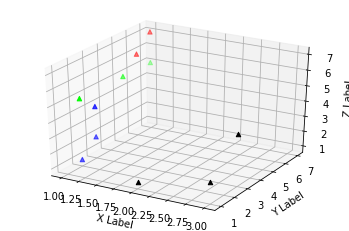

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x1, x2, x3, c=y_train, marker='^')

ax.scatter(x_test[0][0], x_test[0][1], x_test[0][2], c="black", marker='^')
ax.scatter(x_test[1][0], x_test[1][1], x_test[1][2], c="black", marker='^')
ax.scatter(x_test[2][0], x_test[2][1], x_test[2][2], c="black", marker='^')


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()

In [ ]:
## 데이터 슬라이스 만들기
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train))

## 변수선언
W = tf.Variable(tf.random.normal((3, 3)))
b = tf.Variable(tf.random.normal((3,)))

## softmax 함수를 가설로 선언
def softmax_fn(features):
    hypothesis = tf.nn.softmax(tf.matmul(features, W) + b)
    return hypothesis


## cost 함수 정의: cross entropy 사용
def loss_fn(hypothesis, features, labels):
    cost = tf.reduce_mean(-tf.reduce_sum(labels * tf.math.log(hypothesis), axis=1))
    return cost

## 정확도 측정 함수
def accuracy_fn(hypothesis, labels):
    prediction = tf.argmax(hypothesis, 1)
    is_correct = tf.equal(prediction, tf.argmax(labels, 1))
    accuracy = tf.reduce_mean(tf.cast(is_correct, tf.float32))
    return accuracy

#### Learning rate 조절: learning decay 설정       
- starter_learning_rate : 최초 학습시 사용될 learning rate (0.1로 설정하여 0.96씩 감소하는지 확인)
- global_step : 현재 학습 횟수
- decay_steps : 곱할 횟수 정의 (1000번에 마다 적용)
- decay_rate : 기존 learning에 곱할 값
- 적용유무 decayed_learning_rate = learning_rate * decay_rate ^ (global_step / decay_steps)

In [ ]:
is_decay = True
starter_learning_rate = 0.1
    
if(is_decay):    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                 decay_steps=1000,
                                                                 decay_rate=0.96,
                                                                 staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(softmax_fn(features),features,labels)
    return tape.gradient(loss_value, [W,b])

In [ ]:
EPOCHS = 1001

for step in range(EPOCHS):
    for features, labels  in iter(dataset):
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads = grad(softmax_fn(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))
        if step % 100 == 0:
            print("Iter: {}, Loss: {:.4f}".format(step, loss_fn(softmax_fn(features),features,labels)))
x_test = tf.cast(x_test, tf.float32)
y_test = tf.cast(y_test, tf.float32)
test_acc = accuracy_fn(softmax_fn(x_test),y_test)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Loss: 7.8510
Iter: 100, Loss: 0.6915
Iter: 200, Loss: 0.5892
Iter: 300, Loss: 0.5326
Iter: 400, Loss: 0.4927
Iter: 500, Loss: 0.4615
Iter: 600, Loss: 0.4358
Iter: 700, Loss: 0.4139
Iter: 800, Loss: 0.3951
Iter: 900, Loss: 0.3785
Iter: 1000, Loss: 0.3638
Testset Accuracy: 1.0000


# Lab07-3. Overfitting

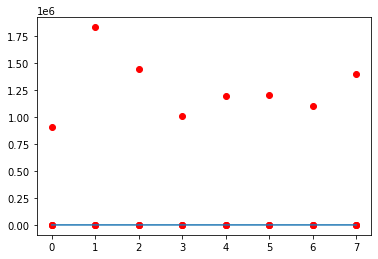

In [ ]:
tf.random.set_seed(777)

xy = np.array([[828.659973, 833.450012, 908100, 828.349976, 831.659973],
               [823.02002, 828.070007, 1828100, 821.655029, 828.070007],
               [819.929993, 824.400024, 1438100, 818.97998, 824.159973],
               [816, 820.958984, 1008100, 815.48999, 819.23999],
               [819.359985, 823, 1188100, 818.469971, 818.97998],
               [819, 823, 1198100, 816, 820.450012],
               [811.700012, 815.25, 1098100, 809.780029, 813.669983],
               [809.51001, 816.659973, 1398100, 804.539978, 809.559998]])

x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)
plt.show()

#### 데이터에 정규화를 적용함 (0~1 scaling)

[[1.         1.         0.         1.         1.        ]
 [0.70548491 0.70439552 1.         0.71881783 0.83755792]
 [0.54412549 0.50274824 0.57608696 0.60646801 0.6606331 ]
 [0.33890353 0.31368023 0.10869565 0.45989134 0.43800918]
 [0.51436    0.4258239  0.30434783 0.58504805 0.42624401]
 [0.49556179 0.4258239  0.31521739 0.48131134 0.49276137]
 [0.11436064 0.         0.20652174 0.22007776 0.18597238]
 [0.         0.07747099 0.5326087  0.         0.        ]]


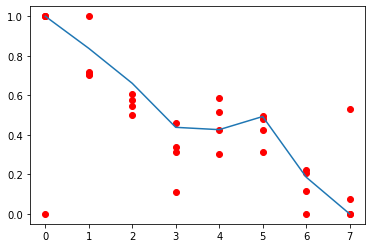

In [ ]:
## normalization 함수 만들기
def normalization(data):
  numerator = data - np.min(data, 0)
  denominator = np.max(data,0) - np.min(data,0)
  return numerator / denominator

#표준화 적용
xy = normalization(xy)
print(xy)
x_train = xy[:, 0:-1]
y_train = xy[:, [-1]]

plt.plot(x_train, 'ro')
plt.plot(y_train)

plt.show()

#### Linear 모델 만들기

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train)).batch(len(x_train)) #batch size: 한번에 학습시킬 사이즈

# 변수설정
W = tf.Variable(tf.random.normal((4, 1)), dtype=tf.float32)
b = tf.Variable(tf.random.normal((1,)), dtype=tf.float32)

# 가설정의
def linearReg_fn(features):
  hypothesis = tf.matmul(features, W) + b
  return hypothesis


## L2 logg 함수정의
def l2_loss(loss, beta=0.01):
  W_reg = tf.nn.l2_loss(W)  # sum(t^2)/2
  loss = tf.reduce_mean(loss+W_reg*beta)
  return loss


## 가설 검증할 cost 함수 정의
def loss_fn(hypothesis, features, labels, flag=False):
  cost = tf.reduce_mean(tf.square(hypothesis - labels))
  if(flag):
    cost = l2_loss(cost)
  return cost


## learning rate decay 설정
is_decay = True
starter_learning_rate = 0.1

if(is_decay):    
    learning_rate = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=starter_learning_rate,
                                                                  decay_steps=50,
                                                                  decay_rate=0.96,
                                                                  staircase=True)
    optimizer = tf.keras.optimizers.SGD(learning_rate)
else:
    optimizer = tf.keras.optimizers.SGD(learning_rate=starter_learning_rate)

def grad(hypothesis, features, labels, l2_flag):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(linearReg_fn(features),features,labels, l2_flag)
    return tape.gradient(loss_value, [W,b]), loss_value

#### 학습

In [ ]:
EPOCHS = 101

for step in range(EPOCHS):
    for features, labels  in dataset:
        features = tf.cast(features, tf.float32)
        labels = tf.cast(labels, tf.float32)
        grads, loss_value = grad(linearReg_fn(features), features, labels, False)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W,b]))        
    if step % 10 == 0:
        print("Iter: {}, Loss: {:.4f}".format(step, loss_value))

Iter: 0, Loss: 1.7346
Iter: 10, Loss: 0.0745
Iter: 20, Loss: 0.0438
Iter: 30, Loss: 0.0273
Iter: 40, Loss: 0.0181
Iter: 50, Loss: 0.0128
Iter: 60, Loss: 0.0099
Iter: 70, Loss: 0.0080
Iter: 80, Loss: 0.0068
Iter: 90, Loss: 0.0060
Iter: 100, Loss: 0.0054


#Lab07-4 MNIST introduction

In [ ]:
# data
tf.random.set_seed(777)
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test / 255.0  # x 데이터 정규화

11493376/11490434 [==============================] - 0s 0us/step


#### Tensorflow Keras

- 모델 정의

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)                                    
])

- Adam optimizer와 cross entropy loss 선언

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- 5 epoch로 학습 수행

In [ ]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2176 - accuracy: 0.9352
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0966 - accuracy: 0.9705
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0669 - accuracy: 0.9791
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0542 - accuracy: 0.9828
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0445 - accuracy: 0.9861


- test data로 모델 평가

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0703 - accuracy: 0.9797


[0.07025158405303955, 0.9797000288963318]

#Lab07-5 Fashion MNIST introduction

In [ ]:
tf.random.set_seed(777)

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

4423680/4422102 [==============================] - 0s 0us/step


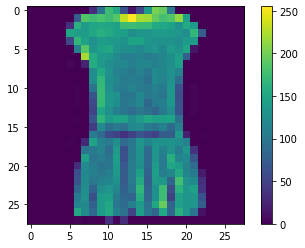

In [ ]:
plt.figure()
plt.imshow(train_images[3])
plt.colorbar()
plt.grid(False)

In [ ]:
train_images.shape

(60000, 28, 28)

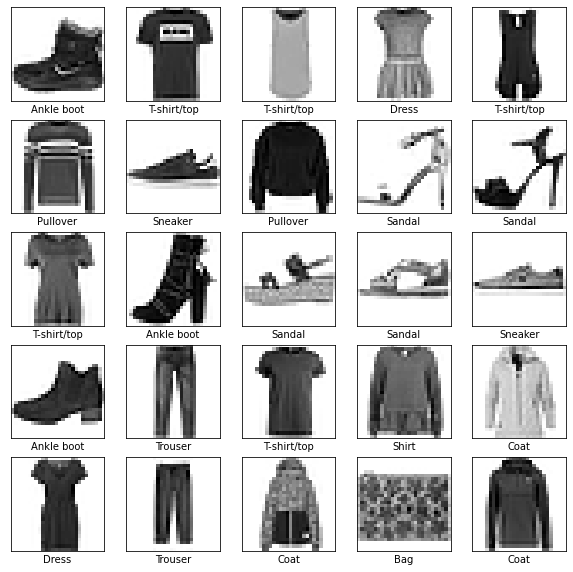

In [ ]:
# 0~1 사이의 값으로 데이터 정규화
train_images = train_images / 255.0
test_images = test_images / 255.0

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])

- 모델 정의

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),  #image 사이즈
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

- adam optimizer와 cross entropy loss 선언

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

- 학습 수행

In [ ]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5064 - accuracy: 0.8232
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3782 - accuracy: 0.8634
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3396 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3135 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2939 - accuracy: 0.8904


- test 데이터로 평가

In [ ]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3588 - accuracy: 0.8748
Test accuracy: 0.8748000264167786


In [ ]:
predictions=model.predict(test_images)
np.argmax(predictions[0])

9

# Lab07-6 IMDB introduction       
: 50,000 movie reviews from the internet movie database (10000개의 빈도수가 높은 단어를 학습 vector로 사용한다.)        
긍정 review와 부정 review를 분류

In [ ]:
imdb = tf.keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
print("Training entries: {}, labels: {}".format(len(train_data), len(train_labels)))
print(train_data[0])

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


Training entries: 25000, labels: 25000
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


IMDB data의 vector를 실제 값으로 변환하여 출력

In [ ]:
# A dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# The first indices are reserved
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0  # 공백값을 벡터로지정
word_index["<START>"] = 1 #시작값을 벡터로 지정
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3 #사용 안하는 단어

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

decode_review(train_data[4])

1646592/1641221 [==============================] - 0s 0us/step


"<START> worst mistake of my life br br i picked this movie up at target for 5 because i figured hey it's sandler i can get some cheap laughs i was wrong completely wrong mid way through the film all three of my friends were asleep and i was still suffering worst plot worst script worst movie i have ever seen i wanted to hit my head up against a wall for an hour then i'd stop and you know why because it felt damn good upon bashing my head in i stuck that damn movie in the <UNK> and watched it burn and that felt better than anything else i've ever done it took american psycho army of darkness and kill bill just to get over that crap i hate you sandler for actually going through with this and ruining a whole day of my life"

In [ ]:
print(train_labels[4])

0


- preprocessing: 학습 및 평가를 위해 256 길이의 단어로 PAD 값을 준다. (뒤의 길이는 0으로 맞춤)

In [ ]:
train_data = tf.keras.preprocessing.sequence.pad_sequences(train_data,
                                                        value=word_index["<PAD>"],
                                                        padding='post',
                                                        maxlen=256)

test_data = tf.keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

print(len(train_data[0]), len(test_data[0]))
print(train_data[0])

256 256
[   1   14   22   16   43  530  973 1622 1385   65  458 4468   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172 4536 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920 4613  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
 5244   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117 5952   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194 7486   18    4  226   22   21  134  476
   26  480    5  144   30 5535   18   51   36   28  224   92   25  10

- 모델 정의: 입력 size와 학습시킬 layer의 크기, activation function 정의

In [ ]:
# input shape is the vocabulary count used for the movie reviews (10,000 words)
vocab_size = 10000

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(vocab_size, 16))
model.add(tf.keras.layers.GlobalAveragePooling1D())
model.add(tf.keras.layers.Dense(16, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(1, activation=tf.nn.sigmoid))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = train_data[:10000]
partial_x_train = train_data[10000:]

y_val = train_labels[:10000]
partial_y_train = train_labels[10000:]

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=40,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    verbose=1)

Epoch 1/40
30/30 [==============================] - 2s 35ms/step - loss: 0.6923 - accuracy: 0.5035 - val_loss: 0.6911 - val_accuracy: 0.4947
Epoch 2/40
30/30 [==============================] - 1s 27ms/step - loss: 0.6884 - accuracy: 0.5133 - val_loss: 0.6857 - val_accuracy: 0.5307
Epoch 3/40
30/30 [==============================] - 1s 28ms/step - loss: 0.6791 - accuracy: 0.5715 - val_loss: 0.6741 - val_accuracy: 0.5991
Epoch 4/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6623 - accuracy: 0.6471 - val_loss: 0.6554 - val_accuracy: 0.6548
Epoch 5/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6373 - accuracy: 0.7010 - val_loss: 0.6294 - val_accuracy: 0.7311
Epoch 6/40
30/30 [==============================] - 1s 18ms/step - loss: 0.6058 - accuracy: 0.7580 - val_loss: 0.6005 - val_accuracy: 0.7171
Epoch 7/40
30/30 [==============================] - 1s 18ms/step - loss: 0.5707 - accuracy: 0.7926 - val_loss: 0.5664 - val_accuracy: 0.7856
Epoch 8/40
30

In [ ]:
results = model.evaluate(test_data, test_labels)
print(results)

782/782 [==============================] - 1s 1ms/step - loss: 0.3276 - accuracy: 0.8718
[0.32757115364074707, 0.8718400001525879]
